# Demonstration Descente du Gradient

## Opérateur logique ET (table 2.3)

      inputs  label
0  [1, 0, 0]     -1
1  [1, 0, 1]     -1
2  [1, 1, 0]     -1
3  [1, 1, 1]      1
Training complete after 49 epochs.

Résultats après entrainement:
[0 0] : -1
[0 1] : -1
[1 0] : -1
[1 1] : 1


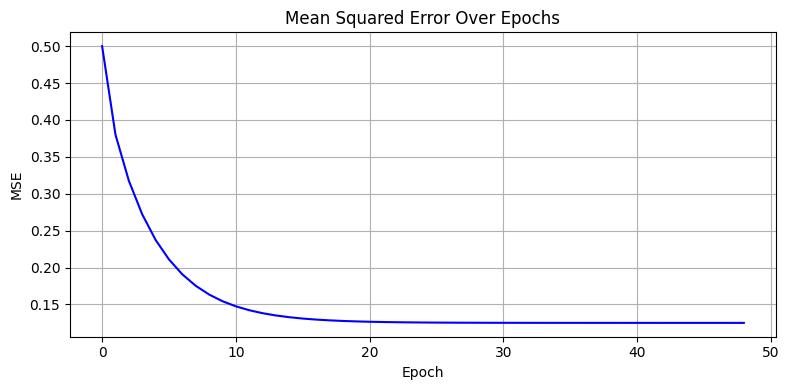

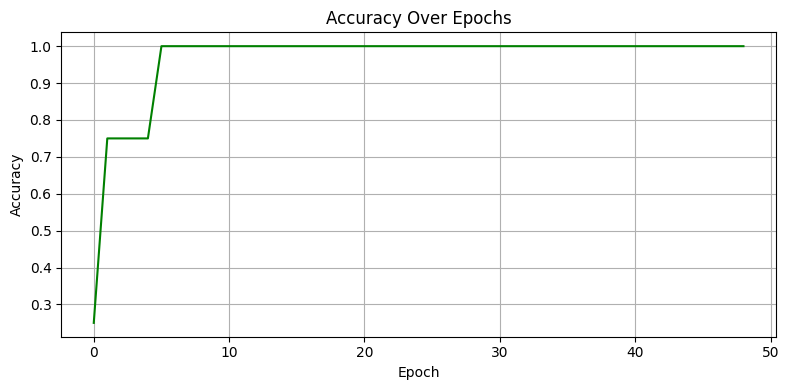

In [1]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.2, epochs=1000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_3.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0.125001, mode="classification", until_no_error=True)

print(f"\nRésultats après entrainement:")
for _, row in df.iterrows():
    print(f"{row["inputs"][1:]} : {perceptron_gradient.activation_function(perceptron_gradient.predict(df))[_]}")

df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

## Classification de données linéaires séparables (table 2.9)

        inputs  label
0    [1, 1, 6]      1
1    [1, 7, 9]     -1
2    [1, 1, 9]      1
3   [1, 7, 10]     -1
4    [1, 2, 5]     -1
5    [1, 2, 7]      1
6    [1, 2, 8]      1
7    [1, 6, 8]     -1
8    [1, 6, 9]     -1
9    [1, 3, 5]     -1
10   [1, 3, 6]     -1
11   [1, 3, 8]      1
12   [1, 3, 9]      1
13   [1, 5, 7]     -1
14   [1, 5, 8]     -1
15  [1, 5, 10]      1
16  [1, 5, 11]      1
17   [1, 4, 6]     -1
18   [1, 4, 7]     -1
19   [1, 4, 9]      1
20  [1, 4, 10]      1
Training complete after 403 epochs.


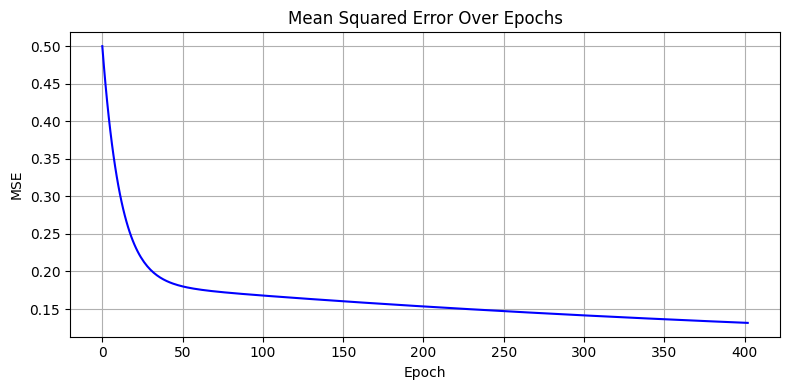

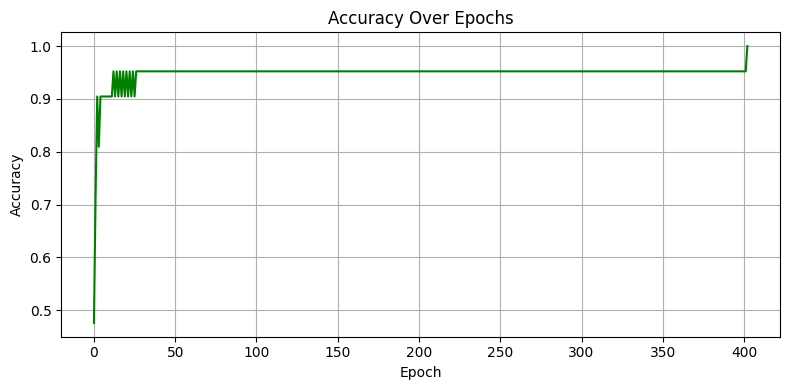

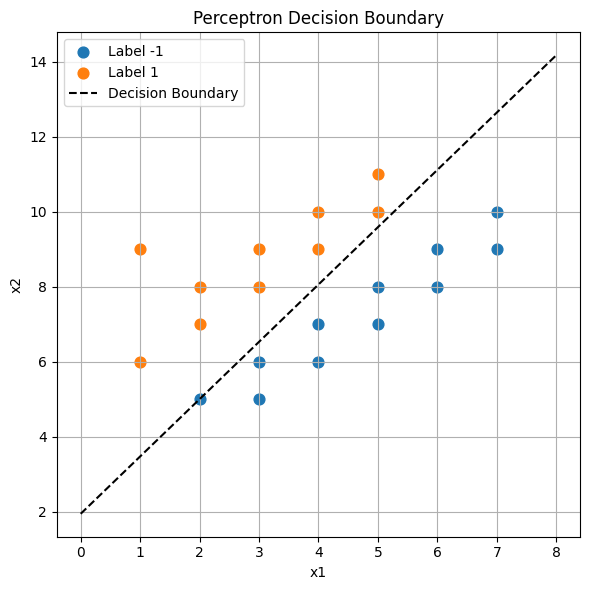

In [2]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.0011, epochs=1000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_9.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0, mode="classification", until_no_error=False)

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

final_weights = perceptron_gradient.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 8, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Classification de données non linéairement séparables (table 2.10)

       inputs  label
0   [1, 1, 2]      1
1   [1, 1, 4]     -1
2   [1, 1, 5]      1
3   [1, 7, 5]     -1
4   [1, 7, 6]     -1
5   [1, 2, 1]     -1
6   [1, 2, 3]      1
7   [1, 2, 4]      1
8   [1, 6, 2]      1
9   [1, 6, 4]     -1
10  [1, 6, 5]     -1
11  [1, 3, 1]     -1
12  [1, 3, 2]     -1
13  [1, 3, 4]      1
14  [1, 3, 5]      1
15  [1, 5, 3]     -1
16  [1, 5, 4]     -1
17  [1, 5, 6]      1
18  [1, 5, 7]      1
19  [1, 4, 2]     -1
20  [1, 4, 3]      1
21  [1, 4, 5]      1
22  [1, 4, 6]      1
Training stopped after 1000 epochs with error 0.3562631133959613


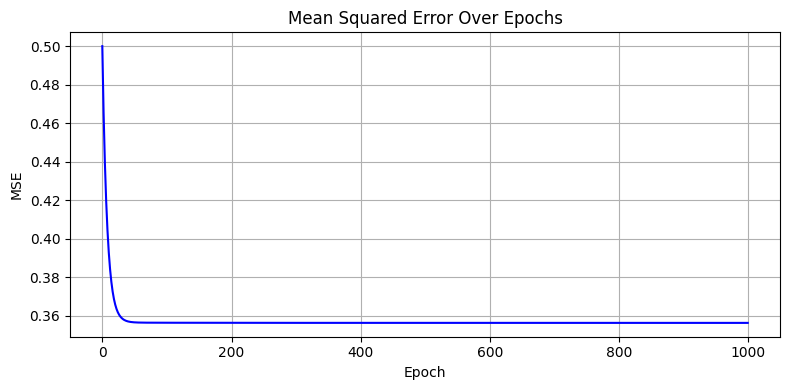

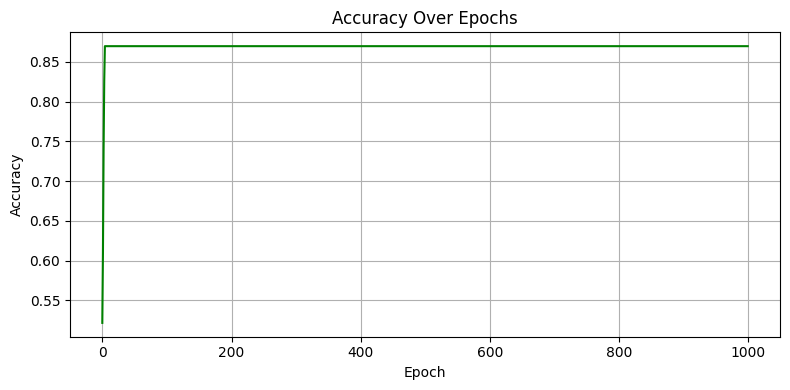

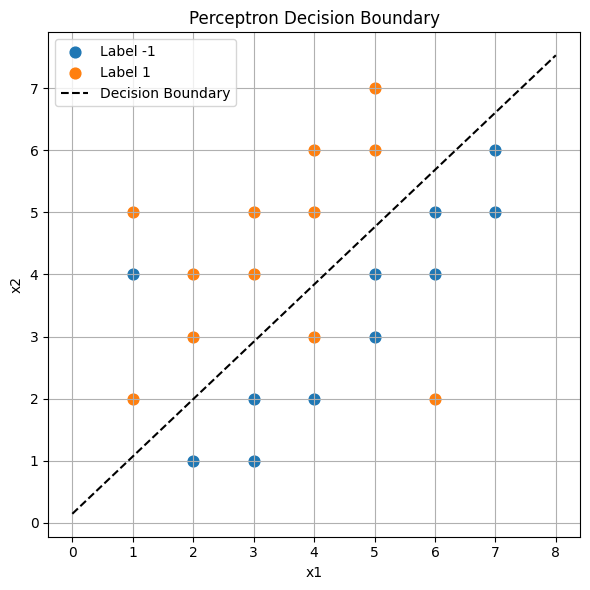

In [3]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.0015, epochs=1000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_10.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0, mode="classification", until_no_error=True)

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

final_weights = perceptron_gradient.weights
bias = final_weights[0]
w1 = final_weights[1]
w2 = final_weights[2]
X = np.array([inp[1:] for inp in df["inputs"]])
y = df["label"].values
plt.figure(figsize=(6, 6))
for label in np.unique(y):
    points = X[y == label]
    plt.scatter(points[:, 0], points[:, 1], label=f"Label {label}", s=60)

# y = -(bias + w1*x) / w2
x_vals = np.linspace(0, 8, 100)
if w2 != 0:
    y_vals = -(bias + w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
else:
    x_intercept = -bias / w1 if w1 != 0 else 0
    plt.axvline(x=x_intercept, color='k', linestyle='--', label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Malgré un Graphique ressemblant au résultat de Mr. l'erreur quadratique moyenne quant à elle n'est pas dutout la même (16,388103 pour Mr et 0.171271 pour moi)

## Régression linéaire (table 2.11)

     inputs  label
0   [1, 10]    4.4
1   [1, 14]    5.6
2   [1, 12]    4.6
3   [1, 18]    6.1
4   [1, 16]    6.0
5   [1, 14]    7.0
6   [1, 22]    6.8
7   [1, 28]   10.6
8   [1, 26]   11.0
9   [1, 16]    7.6
10  [1, 23]   10.8
11  [1, 25]   10.0
12  [1, 20]    6.5
13  [1, 20]    8.2
14  [1, 24]    8.8
15  [1, 12]    5.5
16  [1, 15]    5.0
17  [1, 18]    8.0
18  [1, 14]    7.8
19  [1, 26]    9.0
20  [1, 25]    9.4
21  [1, 17]    8.5
22  [1, 12]    6.4
23  [1, 20]    7.5
24  [1, 23]    9.0
25  [1, 22]    8.1
26  [1, 26]    8.2
27  [1, 22]   10.0
28  [1, 18]    9.1
29  [1, 21]    9.0
Training complete after 4702 epochs.


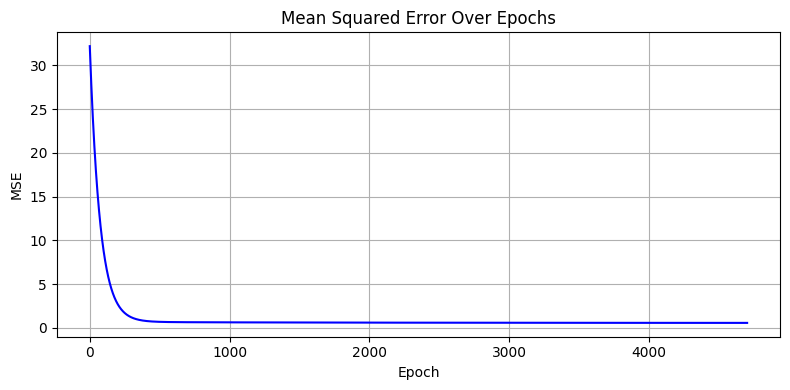

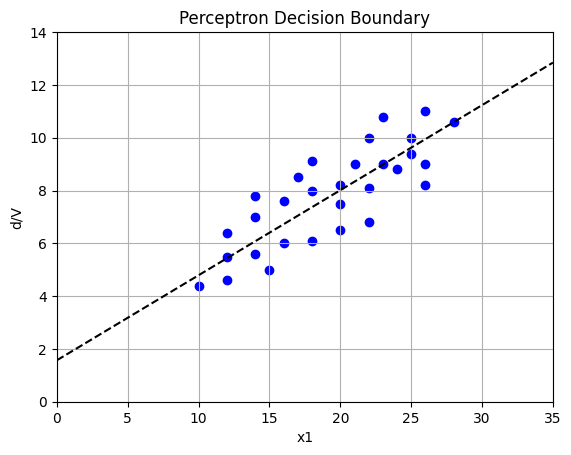

In [4]:
from perceptron import PerceptronGradient
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

perceptron_gradient = PerceptronGradient(input_size=2, learning_rate=0.000167, epochs=10000)
# Chargement des données
df = load_dataframe_from_file("../datasets/table_2_11.csv")
print(df)
perceptron_gradient.weights = np.array([0.0, 0.0])

history = perceptron_gradient.mode_choose(training_data=df, seuil=0.56, mode="regression", until_no_error=None)

graph = history.df

plt.figure(figsize=(8, 4))
plt.plot(graph['epoch'], graph['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

weights = perceptron_gradient.weights
bias = weights[0]
w1 = weights[1]
x_vals = np.array([val[1] for val in df["inputs"]])
x_vals = np.linspace(0, 35, 100)
y_line = bias + w1 * x_vals

x = [item[1] for item in df['inputs']]
y = df['label']

# Création du graphique
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_vals, y_line, 'k--', label="Decision Boundary")

# Ajout d'un titre et des labels
plt.title("Perceptron Decision Boundary")
plt.xlabel("x1")
plt.ylabel("d/V")
plt.xlim(0, 35)
plt.ylim(0, 14)

plt.grid(True)

plt.show()
